# **Project Name - Amazon Prime EDA Project**    












##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 - Soorya K S**


# **Project Summary -**

This project explores Amazon Prime’s catalog (~10k titles) using exploratory data analysis. I clean and normalize multi-valued fields (genres, production countries), reconcile age certifications, and analyze release trends, content mix, audience ratings, and popularity signals (TMDB). I also build fairer leaderboards using a Bayesian weighted rating and examine country/genre effects. The goal is to inform content strategy: what to acquire, produce, and promote.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


What types of content (genres, certifications, formats, regions) are most likely to perform well on Prime, and how should we prioritize acquisition and promotion?

#### **Define Your Business Objective?**

* Identify high-performing genres and age certifications by rating & popularity.

* Understand release trends and catalog balance (Movies vs Shows).

* Highlight top talent (actors/directors) and key markets (countries).

* Produce actionable recommendations for acquisition & promotion.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


### Dataset Loading

In [ ]:
CANDIDATES = [Path('.'), Path('/mnt/data'), Path('/content')]
for base in CANDIDATES:
    if (base/'titles.csv').exists() and (base/'credits.csv').exists():
        DATA_DIR = base
        break
else:
    raise FileNotFoundError("titles.csv / credits.csv not found in ., /mnt/data, or /content")


In [ ]:
titles_df = pd.read_csv(DATA_DIR/'titles.csv')
credits_df = pd.read_csv(DATA_DIR/'credits.csv')

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        category=FutureWarning,
        module=r"pandas\..*",
        message=r".*observed=False.*"
    )
    content_trends = (
        titles_df.groupby(["release_year", "type"], observed=False)
                 .size()
                 .unstack(fill_value=0)
    )


### Dataset First View

In [ ]:
# Dataset First Look
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [ ]:
credits_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(titles_df.shape)
print(credits_df.shape)

(9871, 15)
(124235, 5)


### Dataset Information

In [ ]:
# Dataset Info
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [ ]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(titles_df.duplicated().sum())
print(credits_df.duplicated().sum())

3
56


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(titles_df.isnull().sum())
print(credits_df.isnull().sum())

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


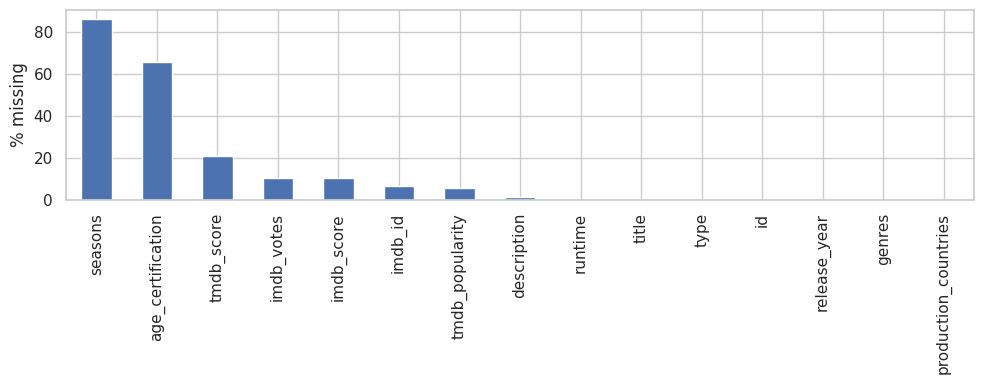

In [ ]:
# Visualizing the missing values
null_pct = titles_df.isna().mean().sort_values(ascending=False)*100
null_pct.plot(kind='bar', figsize=(10,4)); plt.ylabel('% missing'); plt.tight_layout()

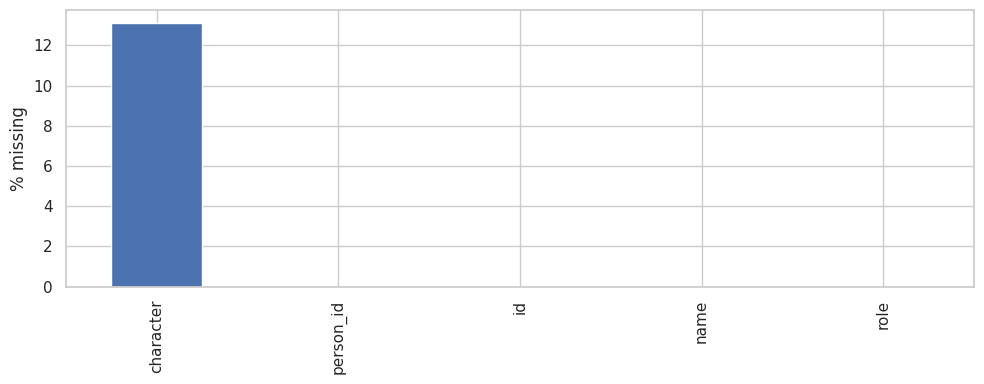

In [ ]:
null_pct = credits_df.isna().mean().sort_values(ascending=False)*100
null_pct.plot(kind='bar', figsize=(10,4)); plt.ylabel('% missing'); plt.tight_layout()

### What did you know about your dataset?

1. titles dataset (9,871 rows, 15 columns)

Contains movie/show details, including genres, release_year, imdb_score, tmdb_popularity, runtime, and production_countries.

genres: Lists multiple genres per title.
imdb_score & tmdb_popularity: Measures of rating and popularity.
release_year: Helps analyze trends over time.

2. credits dataset (124,235 rows, 5 columns)

Contains details about cast and crew (names, roles, character names).
Key columns: id (matches titles dataset), name, character, role.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(titles_df.columns)
print(credits_df.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [ ]:
# Dataset Describe
titles_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Variables Description

1. Movie/Show Information
- id:	Unique identifier for each movie/show.
- title:	Name of the movie or TV show.
- type:	Whether the content is a Movie or TV Show.
- description:	Short summary or plot of the content.
- release_year:	Year the content was released.
- age_certification:	Content rating.
- runtime:	Duration of the content in minutes.
- seasons:	Number of seasons for TV Shows.

2. Content Categorization
- genres:	List of genres associated with the content.
- production_countries:	Country or countries where the content was produced.

3. Popularity & Ratings
- imdb_id:	Unique IMDb identifier for the title.
- imdb_score:	IMDb rating (0-10) based on audience reviews.
- imdb_votes:	Total number of votes for the IMDb rating.
- tmdb_popularity:	Popularity score from TMDB.
- tmdb_score:	TMDB user rating (0-10).

4. Cast & Crew Information
- person_id:	Unique identifier for each cast/crew member.
- name:	Name of the actor, director, or crew member.
- character:	Character name.
- role:	The role of the person.

5. Additional information
* genres and production_countries were originally stored as lists and needed exploding before analysis.
* imdb_score and tmdb_score provide quality insights, while tmdb_popularity indicates audience engagement.
* role helps differentiate between actors, directors, and writers in the dataset.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(titles_df.nunique())
print(credits_df.nunique())

id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64
person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64


In [ ]:
titles_df['production_countries'].unique()

array(["['US']", "['GB']", "['MX', 'US']", "['GB', 'CA']", "['DE', 'US']",
       "['SU']", '[]', "['IN']", "['CA', 'US']", "['MX']", "['XX']",
       "['US', 'IT']", "['JP']", "['IT', 'FR']", "['HK']",
       "['FR', 'DE', 'IT']", "['ES', 'IT']", "['GB', 'US']",
       "['IL', 'US']", "['US', 'FR', 'IT']", "['IT']",
       "['IT', 'GB', 'US']", "['GB', 'US', 'IT', 'MX', 'ES']",
       "['AU', 'US']", "['CH', 'GB']", "['CA', 'FR']", "['US', 'IE']",
       "['GB', 'IT']", "['IT', 'US']", "['FR']", "['GR', 'US']", "['DE']",
       "['HK', 'US', 'CN']", "['US', 'ES']", "['PH', 'US']",
       "['NL', 'US']", "['FR', 'US']", "['IT', 'YU']",
       "['FR', 'DE', 'CH', 'CI']", "['PR', 'US']", "['US', 'PH']",
       "['YU', 'US']", "['IT', 'MX']", "['IT', 'ES', 'DE', 'LI']",
       "['US', 'CA']", "['US', 'GB']", "['US', 'DE']",
       "['US', 'IT', 'FR']", "['CA']", "['FR', 'GB']", "['JP', 'KR']",
       "['GR']", "['ES']", "['US', 'JP']", "['SU', 'US']", "['FR', 'DE']",
       "['FR', 'IT']"

In [ ]:
titles_df['genres'].unique()

array(["['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']",
       "['action', 'drama', 'war', 'western', 'comedy', 'european']",
       "['romance', 'war', 'drama']", ...,
       "['drama', 'family', 'thriller']",
       "['thriller', 'western', 'comedy']",
       "['comedy', 'action', 'family']"], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
for col in ['imdb_score', 'tmdb_score', 'tmdb_popularity']:
    if titles_df[col].isna().any():
        titles_df[col] = titles_df[col].fillna(titles_df[col].median())

titles_df.loc[titles_df['type']=='MOVIE','seasons'] = 0
titles_df['imdb_votes'] = titles_df['imdb_votes'].fillna(0)

In [ ]:
# categorical/text
titles_df['age_certification'] = titles_df['age_certification'].fillna('Unknown')
titles_df['description'] = titles_df['description'].fillna('Unknown')
titles_df['imdb_id'] = titles_df['imdb_id'].fillna('Unknown')

In [ ]:
# Drop true duplicates based on stable identifiers
titles_df = titles_df.drop_duplicates(subset='id').reset_index(drop=True)
credits_df = credits_df.drop_duplicates().reset_index(drop=True)

In [ ]:
# --- Parse list-like strings safely ---
def parse_list(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            # fallback: assume comma-separated
            return [i.strip() for i in x.strip("[]").split(",") if i.strip().strip("'\"")]
    return []

titles_df['genres'] = titles_df['genres'].apply(parse_list)
titles_df['production_countries'] = titles_df['production_countries'].apply(parse_list)


In [ ]:
import numpy as np
import pandas as pd

# 1) target display/order you want in charts
order = ['G','PG','PG-13','R','NC-17','Unknown']   # unified buckets (film+TV)

# 2) exact canonical map (fast)
canonical = {
    'G':'G','TV-G':'G','U':'G','TV-Y':'G',
    'PG':'PG','TV-PG':'PG','TV-Y7':'PG','Y7':'PG',  # Y7 ~ PG-ish
    'PG-13':'PG-13','TV-14':'PG-13','12':'PG-13','12A':'PG-13','13+':'PG-13','U/A 13+':'PG-13',
    'R':'R','TV-MA':'R','16+':'R','18':'R','18+':'R',
    'NC-17':'NC-17',
    'TV-Y7-FV':'PG',
    'NR':'Unknown','UR':'Unknown','UNRATED':'Unknown','NOT RATED':'Unknown'
}

s = (titles_df['age_certification']
        .astype('string')
        .str.upper()
        .str.strip())

norm = s.map(canonical)

# 3) vectorized regex fallbacks only where still NaN
is_na = norm.isna()

# unknown-ish
norm = norm.mask(is_na & s.str.contains(r'^(NR|UR|UNRATED|NOT RATED)$'), 'Unknown')

# unify additional variants without per-row Python
norm = norm.mask(is_na & s.str.contains(r'^TV-Y'), 'G')
norm = norm.mask(is_na & s.str.contains(r'\bY7\b'), 'PG')
norm = norm.mask(is_na & s.str.contains(r'\b(TV-14|13\+|12A?)\b'), 'PG-13')
norm = norm.mask(is_na & s.str.contains(r'\b(TV-MA|16\+|18\+?|A)\b'), 'R')
norm = norm.mask(is_na & s.str.contains(r'\bNC-17\b'), 'NC-17')

# default
norm = norm.fillna('Unknown')

titles_df['age_cert_norm'] = pd.Categorical(norm, categories=order, ordered=True)


In [ ]:
# ---- Reliability helpers ----
VOTE_MIN = 1000
titles_df['tmdb_pop_log'] = np.log1p(titles_df['tmdb_popularity']) if 'tmdb_popularity' in titles_df else np.nan
if 'tmdb_popularity' in titles_df:
    # Guard against duplicates/NaN when qcut
    pop_nonnull = titles_df['tmdb_popularity'].fillna(titles_df['tmdb_popularity'].median())
    titles_df['pop_bucket'] = pd.qcut(pop_nonnull.rank(method='first'), q=5, labels=[1,2,3,4,5])


In [ ]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868 entries, 0 to 9867
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    9868 non-null   object  
 1   title                 9868 non-null   object  
 2   type                  9868 non-null   object  
 3   description           9868 non-null   object  
 4   release_year          9868 non-null   int64   
 5   age_certification     9868 non-null   object  
 6   runtime               9868 non-null   int64   
 7   genres                9868 non-null   object  
 8   production_countries  9868 non-null   object  
 9   seasons               9868 non-null   float64 
 10  imdb_id               9868 non-null   object  
 11  imdb_score            9868 non-null   float64 
 12  imdb_votes            9868 non-null   float64 
 13  tmdb_popularity       9868 non-null   float64 
 14  tmdb_score            9868 non-null   float64 
 15  age_

In [ ]:
titles_df_up = titles_df.explode("genres").explode("production_countries").reset_index(drop=True)

In [ ]:
titles_df_up.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_cert_norm,tmdb_pop_log,pop_bucket
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,PG,2.798744,5
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,PG,2.798744,5
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,PG,2.798744,5
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,PG,2.798744,5
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,PG,2.798744,5


In [ ]:
titles_df_up.shape

(25819, 18)

In [ ]:
titles_df_up.isnull().sum()

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,210
production_countries,1223
seasons,0


In [ ]:
titles_df_up.duplicated().sum()

np.int64(0)

In [ ]:
titles_df_up['genres']= titles_df_up['genres'].fillna('Unknown')
titles_df_up['production_countries']= titles_df_up['production_countries'].fillna('Unknown')

In [ ]:
titles_df_up.isnull().sum()

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


In [ ]:
titles_df_up['genres'].unique()

array(['comedy', 'family', 'animation', 'action', 'fantasy', 'horror',
       'drama', 'war', 'western', 'european', 'romance', 'thriller',
       'crime', 'history', 'sport', 'scifi', 'documentation', 'Unknown',
       'music', 'reality'], dtype=object)

In [ ]:
titles_df_up['production_countries'].unique()

array(['US', 'GB', 'MX', 'CA', 'DE', 'SU', 'Unknown', 'IN', 'XX', 'IT',
       'JP', 'FR', 'HK', 'ES', 'IL', 'AU', 'CH', 'IE', 'GR', 'CN', 'PH',
       'NL', 'YU', 'CI', 'PR', 'LI', 'KR', 'XC', 'HU', 'TW', 'AN', 'MC',
       'CO', 'RO', 'EG', 'TR', 'BE', 'ZA', 'PT', 'CL', 'SE', 'BR', 'DK',
       'NZ', 'RU', 'LU', 'CZ', 'FI', 'AT', 'SK', 'AR', 'VE', 'TH', 'PL',
       'AE', 'SI', 'BA', 'ID', 'NO', 'AF', 'IR', 'IS', 'BG', 'JM', 'RS',
       'SZ', 'LT', 'TC', 'SG', 'UY', 'BO', 'UA', 'MY', 'TN', 'QA', 'NG',
       'KZ', 'GQ', 'MT', 'SO', 'KE', 'United States of America', 'MA',
       'VN', 'BD', 'FJ', 'MN', 'UG', 'TT', 'PK', 'XK', 'PE', 'DO', 'SV',
       'GE', 'PS', 'HR', 'LV', 'AQ', 'LB', 'KH', 'CR', 'BM', 'JO', 'PA',
       'AL', 'CY', 'CU', 'PY', 'EE', 'ET', 'PF', 'EC', 'IO', 'AM', 'SY',
       'CM', 'LY'], dtype=object)

In [ ]:
titles_df_up.production_countries = titles_df_up.production_countries.replace('United States of America','US')

In [ ]:
country_mapping = {
    "US": "United States", "GB": "United Kingdom", "MX": "Mexico", "CA": "Canada", "DE": "Germany",
    "SU": "Soviet Union", "Unknown": "Unknown", "IN": "India", "XX": "Unknown", "IT": "Italy",
    "JP": "Japan", "FR": "France", "HK": "Hong Kong", "ES": "Spain", "IL": "Israel", "AU": "Australia",
    "CH": "Switzerland", "IE": "Ireland", "GR": "Greece", "CN": "China", "PH": "Philippines",
    "NL": "Netherlands", "YU": "Yugoslavia", "CI": "Ivory Coast", "PR": "Puerto Rico", "LI": "Liechtenstein",
    "KR": "South Korea", "XC": "Czechoslovakia", "HU": "Hungary", "TW": "Taiwan", "AN": "Netherlands Antilles",
    "MC": "Monaco", "CO": "Colombia", "RO": "Romania", "EG": "Egypt", "TR": "Turkey", "BE": "Belgium",
    "ZA": "South Africa", "PT": "Portugal", "CL": "Chile", "SE": "Sweden", "BR": "Brazil", "DK": "Denmark",
    "NZ": "New Zealand", "RU": "Russia", "LU": "Luxembourg", "CZ": "Czech Republic", "FI": "Finland",
    "AT": "Austria", "SK": "Slovakia", "AR": "Argentina", "VE": "Venezuela", "TH": "Thailand", "PL": "Poland",
    "AE": "United Arab Emirates", "SI": "Slovenia", "BA": "Bosnia and Herzegovina", "ID": "Indonesia",
    "NO": "Norway", "AF": "Afghanistan", "IR": "Iran", "IS": "Iceland", "BG": "Bulgaria", "JM": "Jamaica",
    "RS": "Serbia", "SZ": "Eswatini (Swaziland)", "LT": "Lithuania", "TC": "Turks and Caicos Islands",
    "SG": "Singapore", "UY": "Uruguay", "BO": "Bolivia", "UA": "Ukraine", "MY": "Malaysia", "TN": "Tunisia",
    "QA": "Qatar", "NG": "Nigeria", "KZ": "Kazakhstan", "GQ": "Equatorial Guinea", "MT": "Malta",
    "SO": "Somalia", "KE": "Kenya", "MA": "Morocco", "VN": "Vietnam", "BD": "Bangladesh", "FJ": "Fiji",
    "MN": "Mongolia", "UG": "Uganda", "TT": "Trinidad and Tobago", "PK": "Pakistan", "XK": "Kosovo",
    "PE": "Peru", "DO": "Dominican Republic", "SV": "El Salvador", "GE": "Georgia", "PS": "Palestine",
    "HR": "Croatia", "LV": "Latvia", "AQ": "Antarctica", "LB": "Lebanon", "KH": "Cambodia", "CR": "Costa Rica",
    "BM": "Bermuda", "JO": "Jordan", "PA": "Panama", "AL": "Albania", "CY": "Cyprus", "CU": "Cuba",
    "PY": "Paraguay", "EE": "Estonia", "ET": "Ethiopia", "PF": "French Polynesia", "EC": "Ecuador",
    "IO": "British Indian Ocean Territory", "AM": "Armenia", "SY": "Syria", "CM": "Cameroon", "LY": "Libya"
}

In [ ]:
titles_df_up = (titles_df
                   .explode('genres')
                   .explode('production_countries')
                   .assign(production_countries=lambda d: d['production_countries'].map(country_mapping).fillna('Unknown')))

In [ ]:
titles_df_up['production_countries'].unique()

array(['United States', 'United Kingdom', 'Mexico', 'Canada', 'Germany',
       'Soviet Union', 'Unknown', 'India', 'Italy', 'Japan', 'France',
       'Hong Kong', 'Spain', 'Israel', 'Australia', 'Switzerland',
       'Ireland', 'Greece', 'China', 'Philippines', 'Netherlands',
       'Yugoslavia', 'Ivory Coast', 'Puerto Rico', 'Liechtenstein',
       'South Korea', 'Czechoslovakia', 'Hungary', 'Taiwan',
       'Netherlands Antilles', 'Monaco', 'Colombia', 'Romania', 'Egypt',
       'Turkey', 'Belgium', 'South Africa', 'Portugal', 'Chile', 'Sweden',
       'Brazil', 'Denmark', 'New Zealand', 'Russia', 'Luxembourg',
       'Czech Republic', 'Finland', 'Austria', 'Slovakia', 'Argentina',
       'Venezuela', 'Thailand', 'Poland', 'United Arab Emirates',
       'Slovenia', 'Bosnia and Herzegovina', 'Indonesia', 'Norway',
       'Afghanistan', 'Iran', 'Iceland', 'Bulgaria', 'Jamaica', 'Serbia',
       'Eswatini (Swaziland)', 'Lithuania', 'Turks and Caicos Islands',
       'Singapore', 'Urugu

In [ ]:
titles_df['type'] = titles_df['type'].astype('category')
titles_df_up['type'] = titles_df['type'].astype('category')


In [ ]:
credits_df = credits_df.drop_duplicates().reset_index(drop=True)

In [ ]:
# Title-level dataframe: use this for trends, distributions, correlations
titles = titles_df.copy()

# People-level dataframe: use this for actors/directors analytics
credits = credits_df.copy()

# When you DO need a merge, keep it for people-centric views only
keep_cols = [c for c in ['id','title','type','release_year','imdb_score','imdb_votes',
                         'tmdb_popularity','runtime','age_cert_norm','genres','production_countries'] if c in titles.columns]
merged = (credits
          .merge(titles[keep_cols], on='id', how='left', validate='many_to_one'))



In [ ]:
# ---- 5) Sanity checks (fail fast if something is off) ----
assert not titles.duplicated('id').any(), "Duplicate titles by id"
if 'runtime' in titles: assert (titles['runtime'].fillna(0) >= 0).all(), "Negative runtimes found"
if 'imdb_score' in titles: assert titles['imdb_score'].between(0,10).all(), "IMDb scores out of [0,10]"

print(f"Using titles from: {titles} | credits from: {credits}")
print(f"Titles: {len(titles):,} | Credits rows: {len(credits):,}")


Using titles from:              id                            title   type  \
0       ts20945                The Three Stooges   SHOW   
1       tm19248                      The General  MOVIE   
2       tm82253      The Best Years of Our Lives  MOVIE   
3       tm83884                  His Girl Friday  MOVIE   
4       tm56584                In a Lonely Place  MOVIE   
...         ...                              ...    ...   
9863   tm510327                     Lily Is Here  MOVIE   
9864  tm1079144  Jay Nog: Something from Nothing  MOVIE   
9865   tm847725                          Chasing  MOVIE   
9866  tm1054116                         Baikunth  MOVIE   
9867   ts275838                 Waking Up Eighty   SHOW   

                                            description  release_year  \
0     The Three Stooges were an American vaudeville ...          1934   
1     During America’s Civil War, Union spies steal ...          1926   
2     It's the hope that sustains the spirit of ever.

In [ ]:
merged.isnull().sum()

,0
person_id,0
id,0
name,0
character,16277
role,0
title,0
type,0
release_year,0
imdb_score,0
imdb_votes,0


In [ ]:
merged["character"].fillna("Unknown", inplace=True)

merged.isnull().sum()

,0
person_id,0
id,0
name,0
character,0
role,0
title,0
type,0
release_year,0
imdb_score,0
imdb_votes,0


### What all manipulations have you done and insights you found?

* Handled the missing values. For imdb_score, tmdb_score and tmdb_popularity, filled with their medians. For imdb_votes, replaced missing values with 0. For seasons replaced missing values with 0 for Movies. Filled with "Unknown" for age_certification, description and imdb_id.
* Droped duplicated values.
* Converted genres and production_countries to list format and exploded it for better analysis.
* Mapped country codes to full country names.


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124179 entries, 0 to 124178
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   person_id             124179 non-null  int64   
 1   id                    124179 non-null  object  
 2   name                  124179 non-null  object  
 3   character             124179 non-null  object  
 4   role                  124179 non-null  object  
 5   title                 124179 non-null  object  
 6   type                  124179 non-null  category
 7   release_year          124179 non-null  int64   
 8   imdb_score            124179 non-null  float64 
 9   imdb_votes            124179 non-null  float64 
 10  tmdb_popularity       124179 non-null  float64 
 11  runtime               124179 non-null  int64   
 12  age_cert_norm         124179 non-null  category
 13  genres                124179 non-null  object  
 14  production_countries  124179 non-nul

# Bayesian weighted rating (fair top titles)

In [ ]:
df = titles_df.copy()
df["imdb_votes"] = df["imdb_votes"].fillna(0)
C = df["imdb_score"].mean()
m = np.nanpercentile(df["imdb_votes"], 75)  # dynamic threshold

den = (df["imdb_votes"] + m).replace(0, np.nan)
df["wr"] = (df["imdb_votes"]/den)*df["imdb_score"] + (m/den)*C
df["wr"] = df["wr"].fillna(C)

(df[["title","type","imdb_score","imdb_votes","wr"]]
 .sort_values("wr", ascending=False)
 .head(20))


,title,type,imdb_score,imdb_votes,wr
9049,Jai Bhim,MOVIE,9.3,175187.0,9.267010
7419,The Chosen,SHOW,9.4,25538.0,9.179721
7855,Soorarai Pottru,MOVIE,9.2,109759.0,9.149237
8975,Clarkson's Farm,SHOW,9.1,31981.0,8.937456
5284,Better Call Saul,SHOW,8.8,404920.0,8.787814
8153,Peranbu,MOVIE,9.1,14708.0,8.767000
4574,Nathan For You,SHOW,8.9,25396.0,8.711030
7838,Panchayat,SHOW,8.8,50358.0,8.704915
2807,Dexter,SHOW,8.7,711566.0,8.693300
2805,House,SHOW,8.7,448480.0,8.689384


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Most Common Genres on the Platform

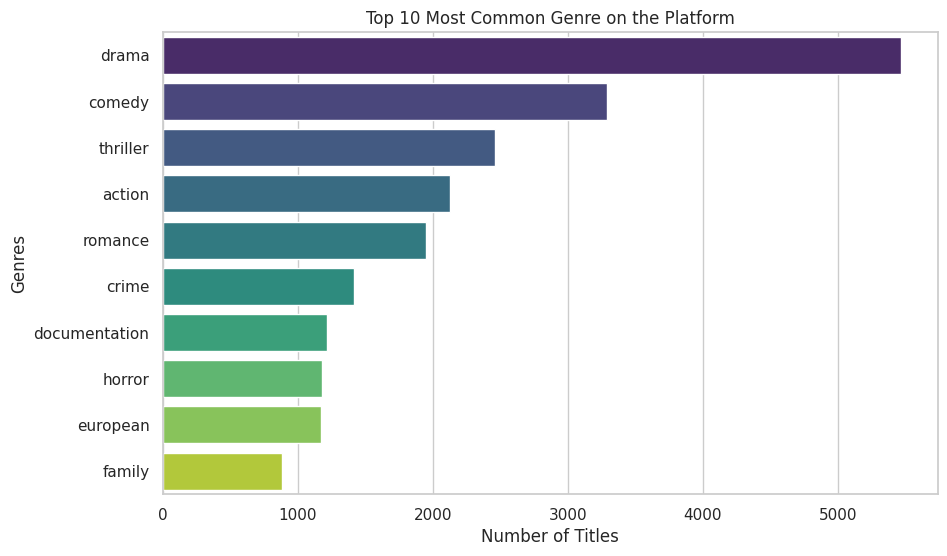

In [ ]:
# count the most common genres
top_genres = titles_df_up['genres'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.title('Top 10 Most Common Genre on the Platform')
plt.show()

##### 1. Why did you pick the specific chart?

Categorical counts with long labels → horizontal bar is the clearest and lets you sort by size.

##### 2. What is/are the insight(s) found from the chart?

* Drama dominates, then Comedy, followed by Thriller/Action.
* Long tail after the top ~5 genres.
* Documentation/European/Family are materially smaller.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Proven demand lanes (Drama/Comedy) → safe bets for merchandising rows, promo, and catalog depth.
* Risk: Over-concentration; smaller but strategic genres (Family, Documentary) may be under-served → missed audience segments.




#### Chart - 2: Top 10 Content-Producing Countries

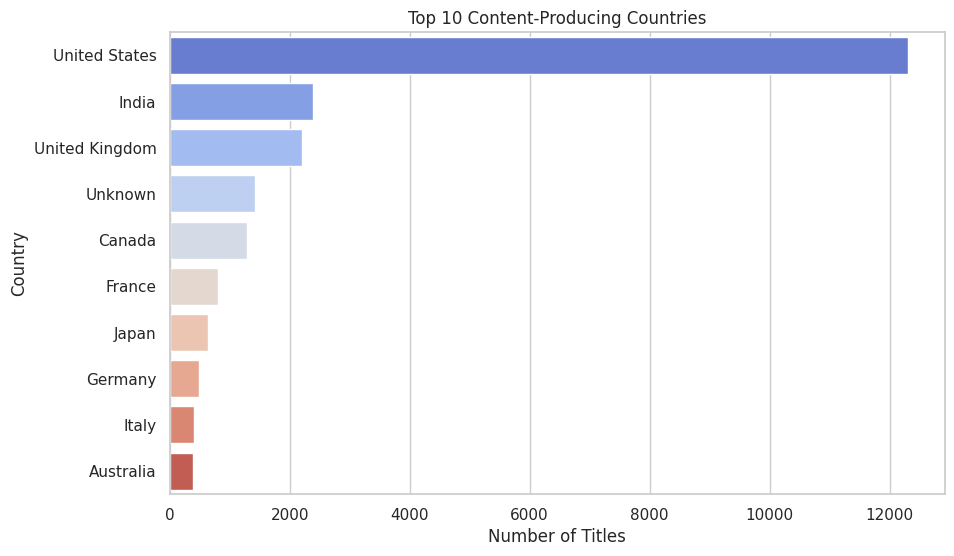

In [ ]:
top_countries = titles_df_up['production_countries'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Content-Producing Countries')
plt.show()

##### 1. Why did you pick the specific chart?

Categorical counts with long labels → horizontal bar is the clearest and lets you sort by size.

##### 2. What is/are the insight(s) found from the chart?

* The US contributes the overwhelming majority.
* India and the UK are the next significant sources; several others trail far behind.
* “Unknown” metadata is non-trivial.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Lean into US/UK/IN for breadth; localize and promote for those markets.
* Negative: Heavy US skew → catalog monoculture risk. Invest in non-US acquisitions (e.g., KR/JP/ES) and fix “Unknown” country metadata that harms discovery.



#### Chart - 3: Distribution of IMDB Ratings

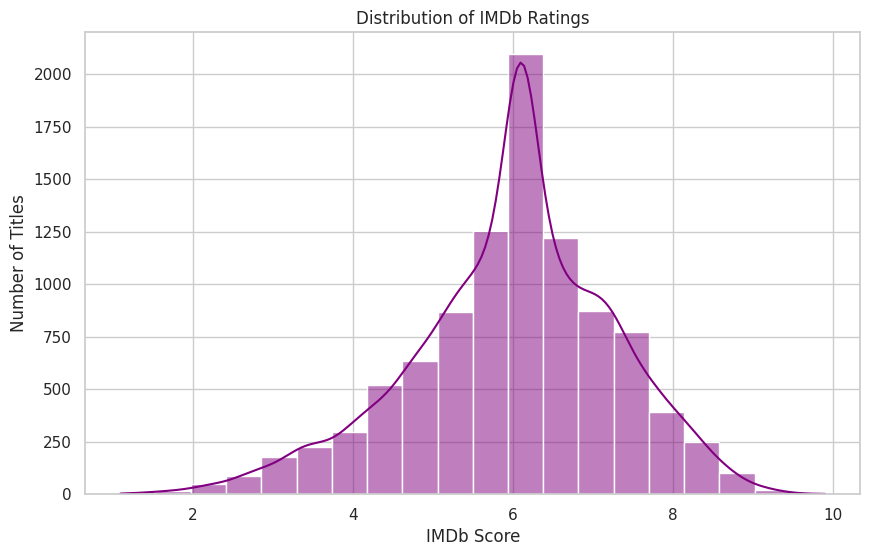

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(titles_df["imdb_score"].dropna(), bins=20, kde=True, color="purple")
plt.xlabel("IMDb Score")
plt.ylabel("Number of Titles")
plt.title("Distribution of IMDb Ratings")
plt.show()


##### 1. Why did you pick the specific chart?

Best for showing the shape (central tendency + spread) of a single numeric variable.



##### 2. What is/are the insight(s) found from the chart?

* Ratings are bell-ish with a peak around ~6.
* Thin tails toward very low/high scores; very few ≥ 8.5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Set realistic “quality” baselines for promos (e.g., feature ≥7.0 or WR-adjusted titles).
* Risk: If most of your surfacing rows are ~6, user satisfaction can stagnate—prioritize higher-rated or WR-top tiles to lift perceived quality.



#### Chart - 4: Runtime Distribution

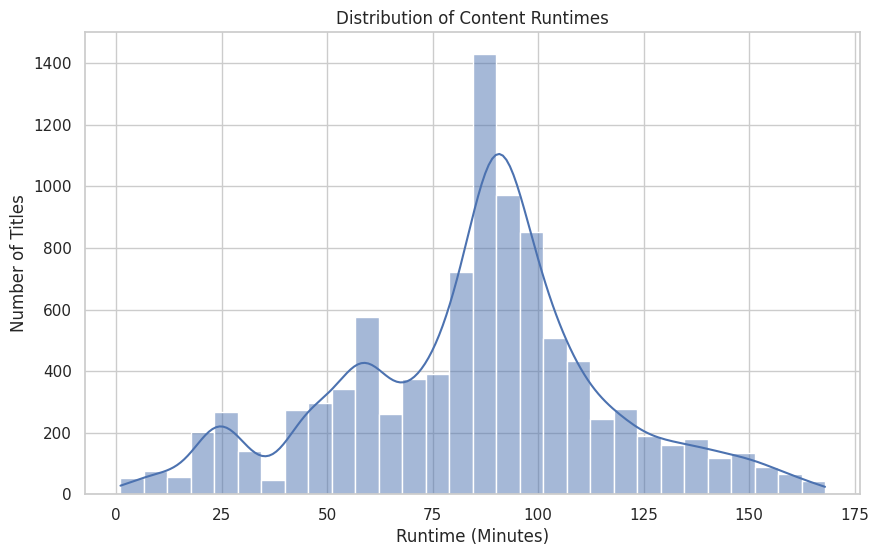

In [ ]:
plt.figure(figsize=(10, 6))
cap = titles_df['runtime'].quantile(0.99)
sns.histplot(titles_df.query("runtime <= @cap")['runtime'], bins=30, kde=True)

plt.xlabel("Runtime (Minutes)")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Runtimes")
plt.show()


##### 1. Why did you pick the specific chart?

Shows overall consumption length patterns and outliers.

##### 2. What is/are the insight(s) found from the chart?

* Strong mass in ~80-110 min (feature films).
* Secondary bumps at ~20-30 min (episodes/shorts).
* Long tail beyond 140 min is small.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Program rails around typical 90-100 min sessions; create “quick watch” rows for ≤30 min.
* Risk: Over-index on very long titles—low completion risk and weaker engagement.



#### Chart - 5: Top 10 Actors & Directors by Number of Titles

In [ ]:
if {'role','name','id'}.issubset(merged.columns):
    top_actors = (merged.query("role=='ACTOR'").groupby('name')['id'].nunique().sort_values(ascending=False).head(10))
    top_directors = (merged.query("role=='DIRECTOR'").groupby('name')['id'].nunique().sort_values(ascending=False).head(10))
    display(top_actors.to_frame('distinct_titles'))
    display(top_directors.to_frame('distinct_titles'))

,distinct_titles
name,
George 'Gabby' Hayes,49
Roy Rogers,45
Bess Flowers,44
Gene Autry,40
Nassar,37
Herman Hack,35
Earl Dwire,34
George Morrell,34
Forrest Taylor,34


,distinct_titles
name,
Joseph Kane,41
Sam Newfield,38
Jay Chapman,34
Lesley Selander,22
John English,21
Harry L. Fraser,21
William Nigh,20
Robert N. Bradbury,17
Manny Rodriguez,17


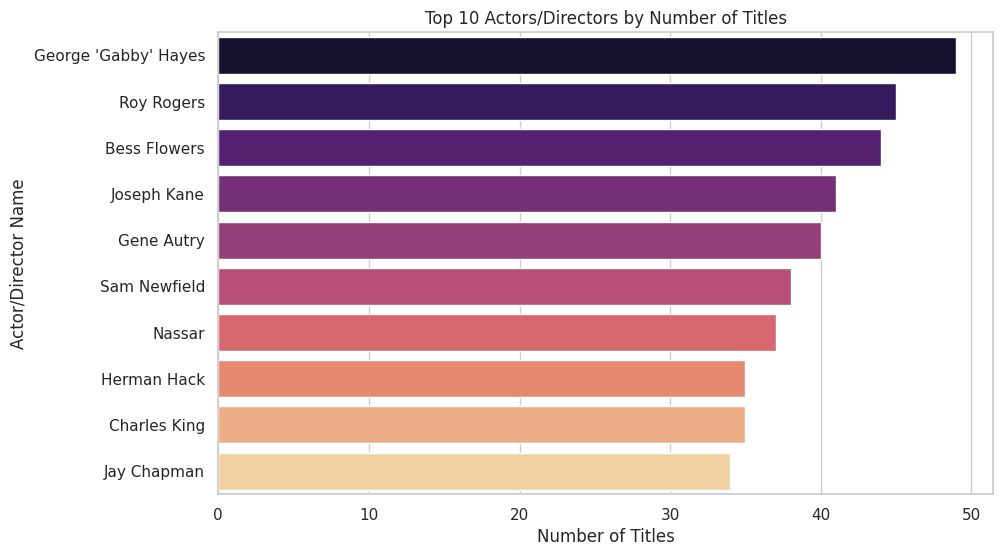

In [ ]:
top_actors = merged["name"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")
plt.xlabel("Number of Titles")
plt.ylabel("Actor/Director Name")
plt.title("Top 10 Actors/Directors by Number of Titles")
plt.show()

##### 1. Why did you pick the specific chart?

Ranked categorical counts; bar chart communicates “depth” per person.

##### 2. What is/are the insight(s) found from the chart?

* The list skews to classic/older Western talent (e.g., Roy Rogers, Gabby Hayes).
* Suggests historical back-catalog strength vs. modern star power.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Curate nostalgia collections; target older demographics.
* Risk: Aging talent mix may not convert younger users. Balance with contemporary, internationally recognized talent.



#### Chart - 6: Movies vs. Shows Growth Over Time

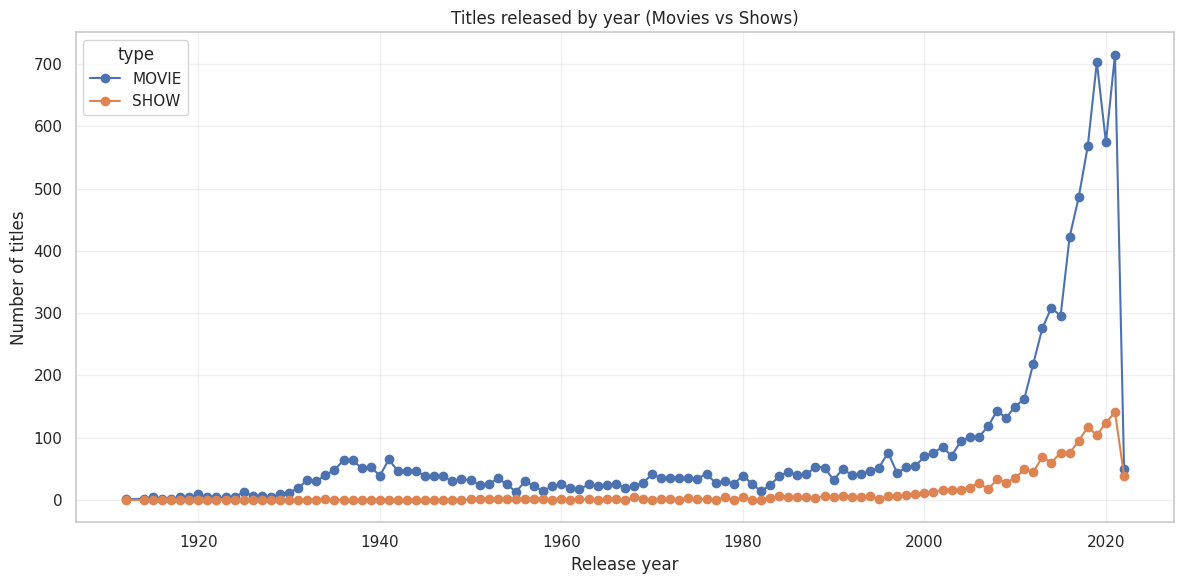

In [ ]:
content_trends = titles_df.groupby(["release_year", "type"]).size().unstack()

ax = content_trends.plot(kind="line", marker="o", figsize=(12, 6))
ax.set_title("Titles released by year (Movies vs Shows)")
ax.set_xlabel("Release year")
ax.set_ylabel("Number of titles")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Time trends → line chart with markers.

##### 2. What is/are the insight(s) found from the chart?

* Sharp growth post-2010, especially for movies; shows also climb.
* Recent year drop likely data cutoff, not a real decline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Justifies expanding recent-year rails; highlights areas for licensing recency.
* Risk: If growth is mostly movies, series depth may lag—hurts binge/retention.



#### Chart - 7:  Popularity vs. IMDb Score

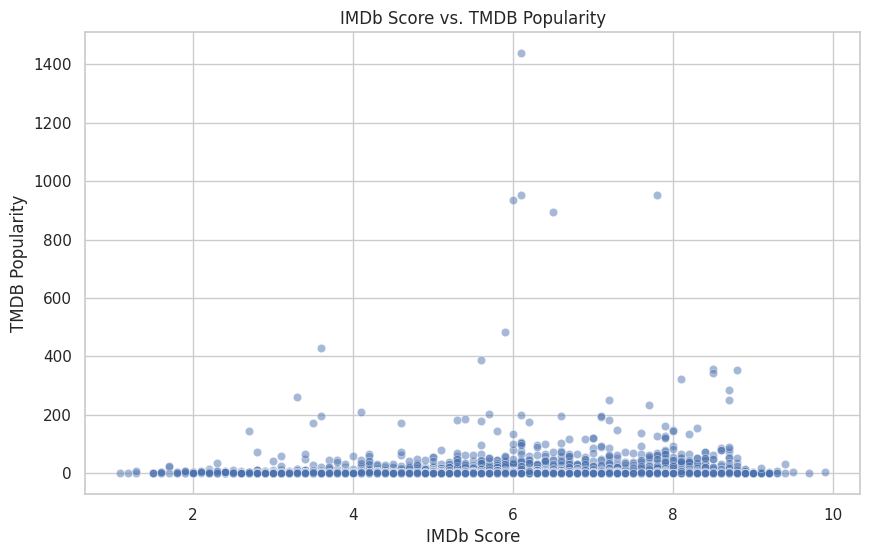

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="imdb_score", y="tmdb_popularity", data=titles_df, alpha=0.5)
plt.xlabel("IMDb Score")
plt.ylabel("TMDB Popularity")
plt.title("IMDb Score vs. TMDB Popularity")
plt.show()

##### 1. Why did you pick the specific chart?

Relationship between two continuous variables; checks alignment of quality vs buzz.

##### 2. What is/are the insight(s) found from the chart?

* Weak correlation: many mid-rated titles with low popularity; a few popular outliers at moderate scores.
* Popularity is not guaranteed by high IMDb (and vice versa).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Use two-stage ranking—surface by TMDB popularity but filter/boost by WR-adjusted IMDb to balance hype + satisfaction.
* Risk: Over-promoting low-rated but popular titles can erode brand trust (more exits/low stars).


#### Chart - 8: Seasons vs. Popularity (TV Shows)

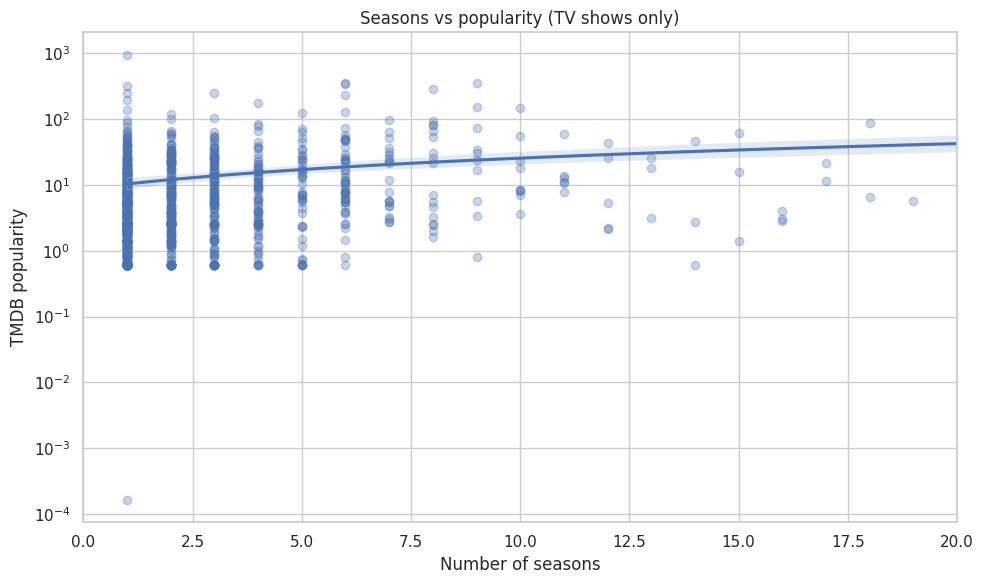

In [ ]:
tv = titles_df.query("type == 'SHOW'").copy()
tv = tv.dropna(subset=["seasons", "tmdb_popularity"])

plt.figure(figsize=(10,6))
sns.regplot(x="seasons", y="tmdb_popularity", data=tv, scatter_kws={"alpha":0.3})
plt.xlabel("Number of seasons"); plt.ylabel("TMDB popularity")
plt.title("Seasons vs popularity (TV shows only)")
plt.yscale("log"); plt.xlim(0, 20)
plt.tight_layout(); plt.show()


##### 1. Why did you pick the specific chart?

Checks how content depth (seasons) relates to popularity; log scale suits skewed popularity.

##### 2. What is/are the insight(s) found from the chart?

* Slight positive trend: more seasons → higher popularity, but diminishing returns after ~6-8 seasons.
* High variance at low season counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Renew/greenlight toward 3-6 seasons in strong genres.
* Risk: Funding very long-running shows (>10 seasons) yields small marginal gains—cap spend unless ROI proven.


#### Chart - 9:  Genre vs. Runtime

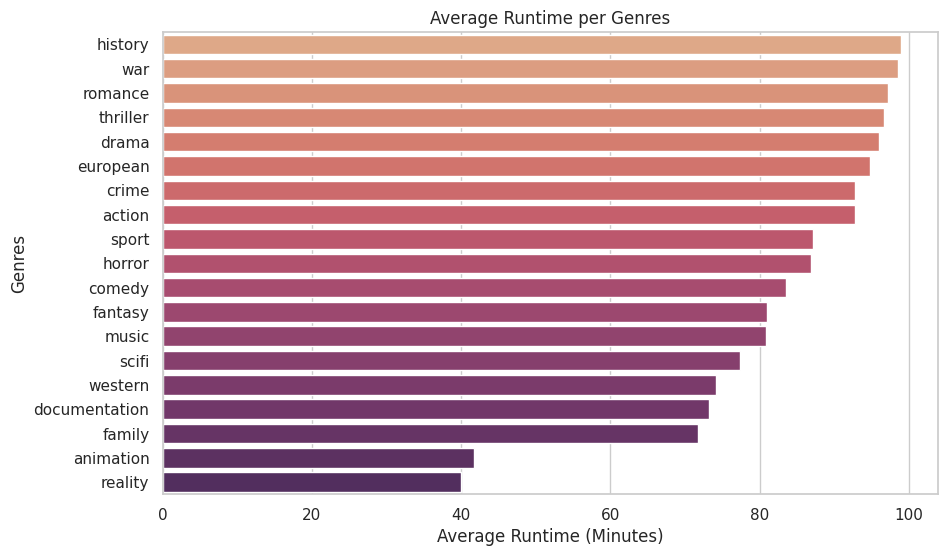

In [ ]:
avg_runtime_per_genre = titles_df_up.groupby('genres')['runtime'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_runtime_per_genre.values, y=avg_runtime_per_genre.index, palette="flare")
plt.xlabel("Average Runtime (Minutes)")
plt.ylabel("Genres")
plt.title("Average Runtime per Genres")
plt.show()

##### 1. Why did you pick the specific chart?

Compare numeric means across categories.

##### 2. What is/are the insight(s) found from the chart?

* History/War/Romance/Thriller run longer (~90-100 min).
* Animation/Reality are shorter (~40 min).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Align programming rails by session length (e.g., “Quick Laughs” for short genres, “Epic Stories” for long).
* Risk: Mis-slotting (e.g., long History in “quick watch”) depresses CTR and completion.

#### Chart - 10: IMDb Score by Country

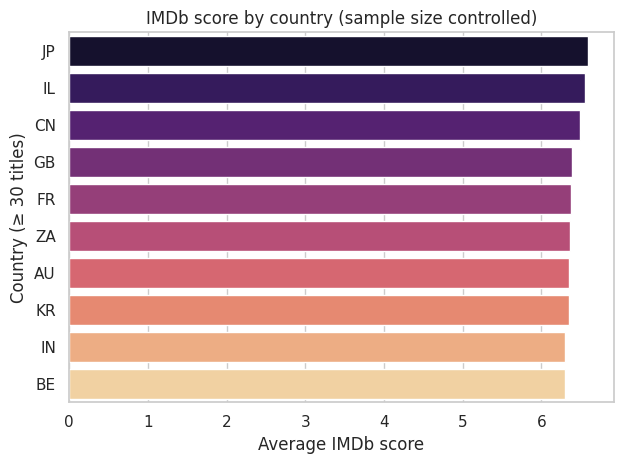

In [ ]:
tmp = (
    titles_df.explode("production_countries")
             .dropna(subset=["production_countries","imdb_score"])
             .groupby("production_countries")
             .agg(n_titles=("imdb_score","size"), mean_imdb=("imdb_score","mean"))
             .query("n_titles >= 30")
             .sort_values("mean_imdb", ascending=False)
             .head(10)
)
sns.barplot(x="mean_imdb", y=tmp.index, data=tmp.reset_index(), palette="magma")
plt.xlabel("Average IMDb score")
plt.ylabel("Country (≥ 30 titles)")
plt.title("IMDb score by country (sample size controlled)")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Controlled average by group; bar chart ranks them cleanly.

##### 2. What is/are the insight(s) found from the chart?

* Top countries (e.g., JP, IL, CN, GB, FR) show slightly higher average IMDb than the global mean (~6+).
* Differences are modest but consistent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Target acquisitions/localization from high-average markets (JP/IL/KR/GB) to lift perceived quality and diversify.
* Risk: Ignoring these markets maintains a US-heavy catalog and leaves international growth on the table.


#### Chart - 11: Age Certification vs. IMDb Ratings

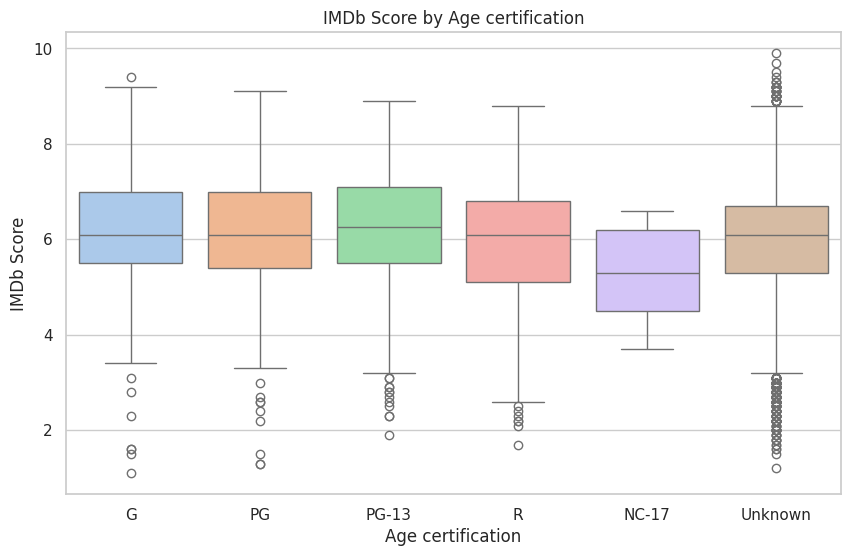

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="age_cert_norm", y="imdb_score", data=titles_df, palette="pastel")
plt.xlabel("Age certification")
plt.ylabel("IMDb Score")
plt.title("IMDb Score by Age certification")
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots compare distributions across categories—median, spread, and outliers—at a glance.

##### 2. What is/are the insight(s) found from the chart?

* Medians for G/PG/PG-13 sit a bit higher than R/NC-17.
* NC-17 has the lowest median and a tight range.
* Unknown shows wide variance → metadata quality issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Emphasize PG-13/PG in promos and acquisitions—broad reach with solid satisfaction.
* Risk: Heavy investment in NC-17 is unlikely to lift average ratings. Clean up Unknown certifications to improve recommendations & parental controls.



#### Chart - 12: Relationship Between IMDb Score, Runtime & Popularity

<Axes: xlabel='runtime', ylabel='imdb_score'>

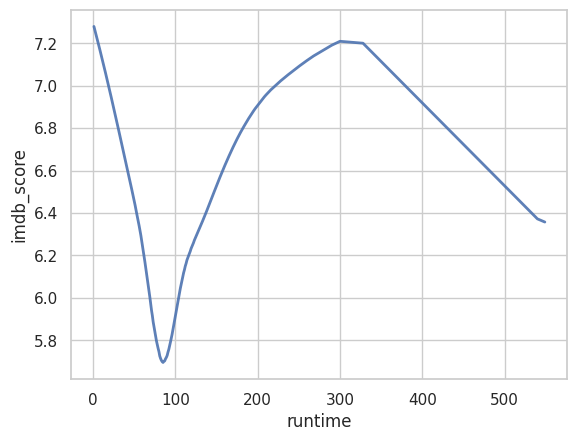

In [ ]:
# add on top of your scatter (same figure)
sns.regplot(data=df, x="runtime", y="imdb_score", scatter=False, lowess=True,
            line_kws={"lw": 2, "alpha": 0.9})


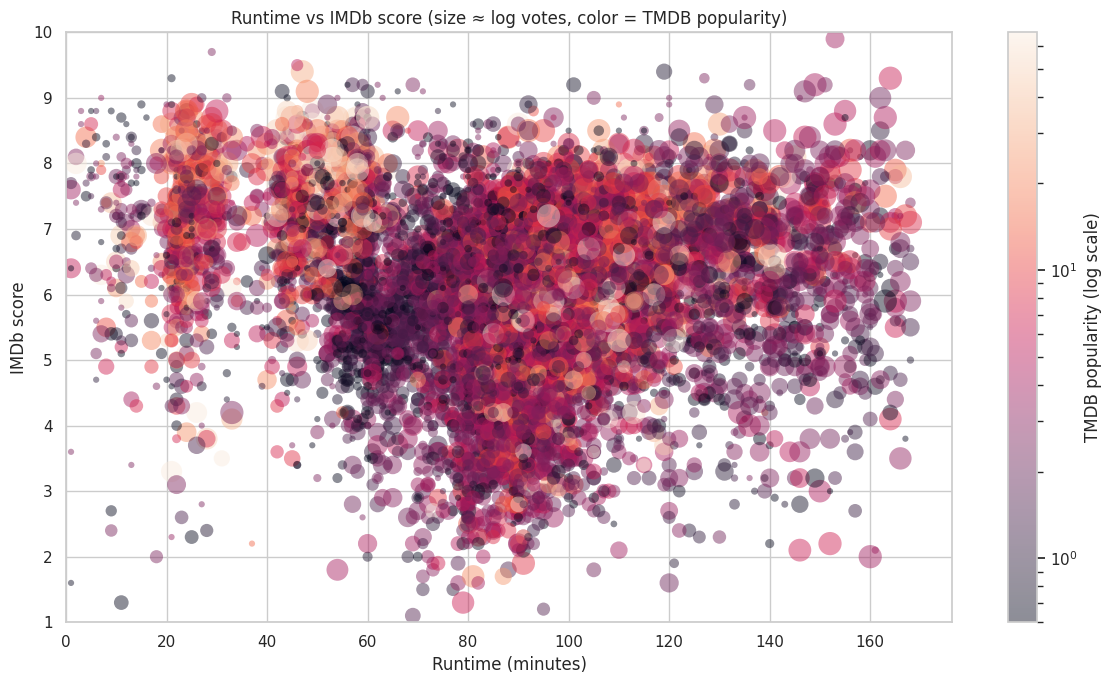

In [ ]:

from matplotlib.colors import LogNorm

# 1) base filter
df = (titles_df[["runtime","imdb_score","imdb_votes","tmdb_popularity","type"]]
      .dropna()
      .query("runtime > 0 & imdb_votes > 0 & tmdb_popularity > 0")
      .copy())

# 2) clip extreme runtimes, THEN recompute all derived columns
rt_hi = df["runtime"].quantile(0.99)
df = df[df["runtime"] <= rt_hi].copy()

# 3) size = scaled log(votes), computed on the FINAL df
df["votes_log"] = np.log1p(df["imdb_votes"])
v_lo, v_hi = df["votes_log"].quantile([0.05, 0.95])
if v_hi <= v_lo:  # rare edge case
    v_lo = df["votes_log"].min()
    v_hi = df["votes_log"].max() + 1e-6

df["size"] = 20 + 260 * (df["votes_log"].clip(v_lo, v_hi) - v_lo) / (v_hi - v_lo)

# 4) color = TMDB popularity on a real log color scale
pop = df["tmdb_popularity"].astype(float)
pop_lo, pop_hi = pop.quantile([0.01, 0.99])
norm = LogNorm(vmin=max(pop_lo, 1e-6), vmax=max(pop_hi, pop_lo + 1e-6))

# (Optional) sanity checks so this never bites you again
assert len(df["size"]) == len(df["runtime"]) == len(df["imdb_score"]) == len(pop), "length mismatch"
sizes = df["size"].astype(float).to_numpy()

# 5) plot
sns.set_theme(context="notebook", style="whitegrid")
plt.figure(figsize=(12, 7))
sc = plt.scatter(
    df["runtime"].to_numpy(),
    df["imdb_score"].to_numpy(),
    s=sizes,
    c=pop.to_numpy(),
    norm=norm,
    alpha=0.45,
    linewidths=0
)
plt.colorbar(sc, label="TMDB popularity (log scale)")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb score")
plt.title("Runtime vs IMDb score (size ≈ log votes, color = TMDB popularity)")
plt.ylim(1, 10); plt.xlim(left=0)
plt.tight_layout(); plt.show()


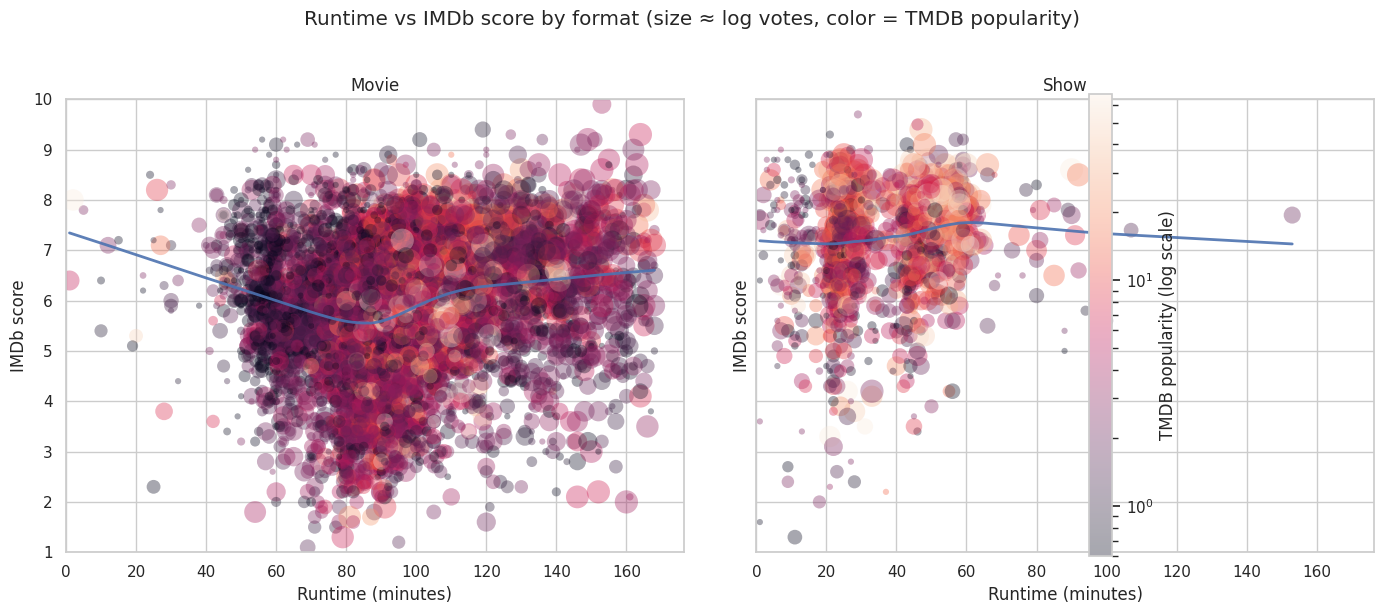

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

# keep the same df, v_lo/v_hi, norm from your final cell
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
for ax, t in zip(axes, ["MOVIE", "SHOW"]):
    sub = df[df["type"] == t].copy()
    # keep size scaling comparable across panels (use global v_lo/v_hi)
    sub_sizes = 20 + 260 * (sub["votes_log"].clip(v_lo, v_hi) - v_lo) / (v_hi - v_lo)
    sc = ax.scatter(sub["runtime"], sub["imdb_score"],
                    s=sub_sizes, c=sub["tmdb_popularity"],
                    norm=norm, alpha=0.35, linewidths=0)
    sns.regplot(data=sub, x="runtime", y="imdb_score", scatter=False, lowess=True,
                ax=ax, line_kws={"lw":2, "alpha":0.9})
    ax.set_title(t.title())
    ax.set_xlabel("Runtime (minutes)")
    ax.set_ylabel("IMDb score")
    ax.set_ylim(1, 10); ax.set_xlim(left=0)

cbar = fig.colorbar(sc, ax=axes, label="TMDB popularity (log scale)")
fig.suptitle("Runtime vs IMDb score by format (size ≈ log votes, color = TMDB popularity)", y=1.02)
fig.tight_layout()


##### 1. Why did you pick the specific chart?

* A bubble scatter lets you visualize a relationship (runtime↔score) while encoding confidence (votes) and buzz (popularity) simultaneously.
* Faceting separates movies vs shows, revealing format-specific dynamics that a single plot hides.

##### 2. What is/are the insight(s) found from the chart?

* Runtime has little monotonic effect on score.
* Engagement clusters around ~80-120 min; very long films don't rate better.
* Popularity spans all runtimes—runtime isn't the driver.
* Movies: slight dip around 70-90 min, then small rebound—overall flat effect.
* Shows: gentle rise up to ~30-45 min episodes, then plateau/slight decline.
* Outliers exist, but trend is modest.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



* Positive: Program rails around 90–110 min “feature” sessions; don’t assume “longer = better.”
* Risk: Over-indexing on very long titles risks lower completion without ratings upside.
* Positive: For shows, prioritize ~25–45 min episode lengths; for movies, avoid extremes.
* Risk: Funding very long episodes or ultra-short experiments may have diminishing returns.


#### Chart - 13: Popularity by Genre & Age Certification

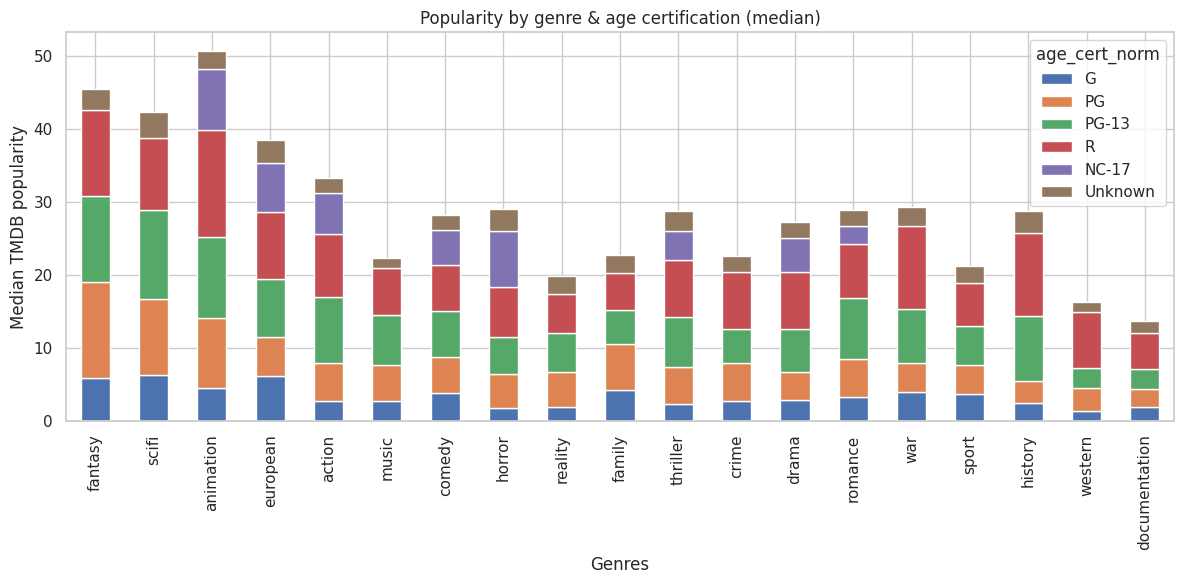

In [ ]:
genre_age = (
    titles_df.explode("genres")
             .dropna(subset=["genres", "tmdb_popularity", "age_cert_norm"])
             .groupby(["genres", "age_cert_norm"])["tmdb_popularity"]
             .median()
             .unstack(fill_value=0)
)
# sort by overall median across age bins (stable & readable)
genre_age = (genre_age
             .assign(_sort=genre_age.median(axis=1))
             .sort_values("_sort", ascending=False)
             .drop(columns="_sort"))

ax = genre_age.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Genres"); ax.set_ylabel("Median TMDB popularity")
ax.set_title("Popularity by genre & age certification (median)")
plt.tight_layout(); plt.show()


##### 1. Why did you pick the specific chart?

Stacked bars show both central popularity (median) and mix of age certifications within each genre.

##### 2. What is/are the insight(s) found from the chart?

* Fantasy, Sci-Fi, Animation have highest median popularity.
* Many high-performing genres skew PG-13/R, while Family is mid-pack but stable.
* Western/Documentation trail on popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



* Positive: Double-down on Fantasy/Sci-Fi/Animation, especially PG-13 (broad reach) and R (adult core).


* Risk: Over-spending on low-median genres (e.g., Western) likely won’t move engagement KPIs; keep as niche rows.

#### Chart - 14 - Correlation Heatmap

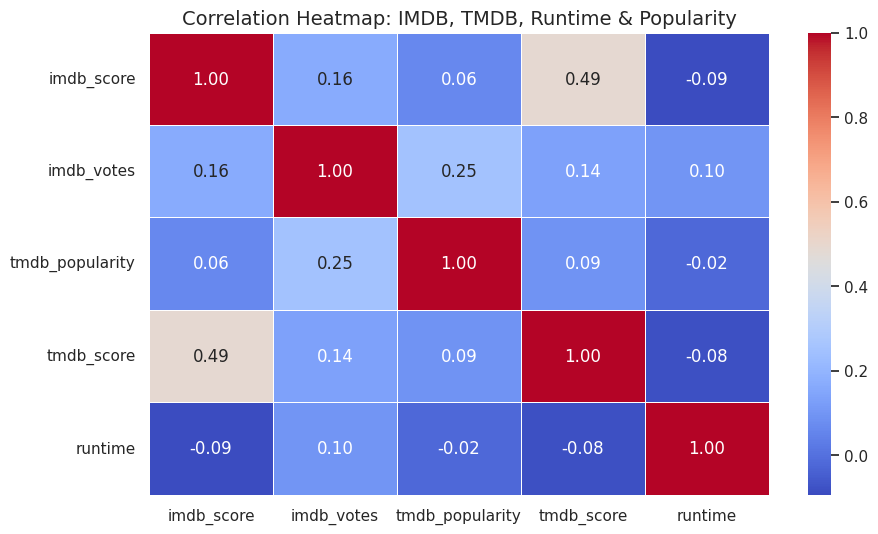

In [ ]:
corr_matrix = titles_df[["imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score", "runtime"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap: IMDB, TMDB, Runtime & Popularity", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps compactly show linear correlations across multiple metrics.

##### 2. What is/are the insight(s) found from the chart?

* IMDb score ↔ TMDB score: moderate (~0.49) → quality signals align somewhat.
* Popularity correlates weakly with IMDb score but more with votes (~0.25).
* Runtime is weakly related to everything.

#### Chart - 15 - Pair Plot

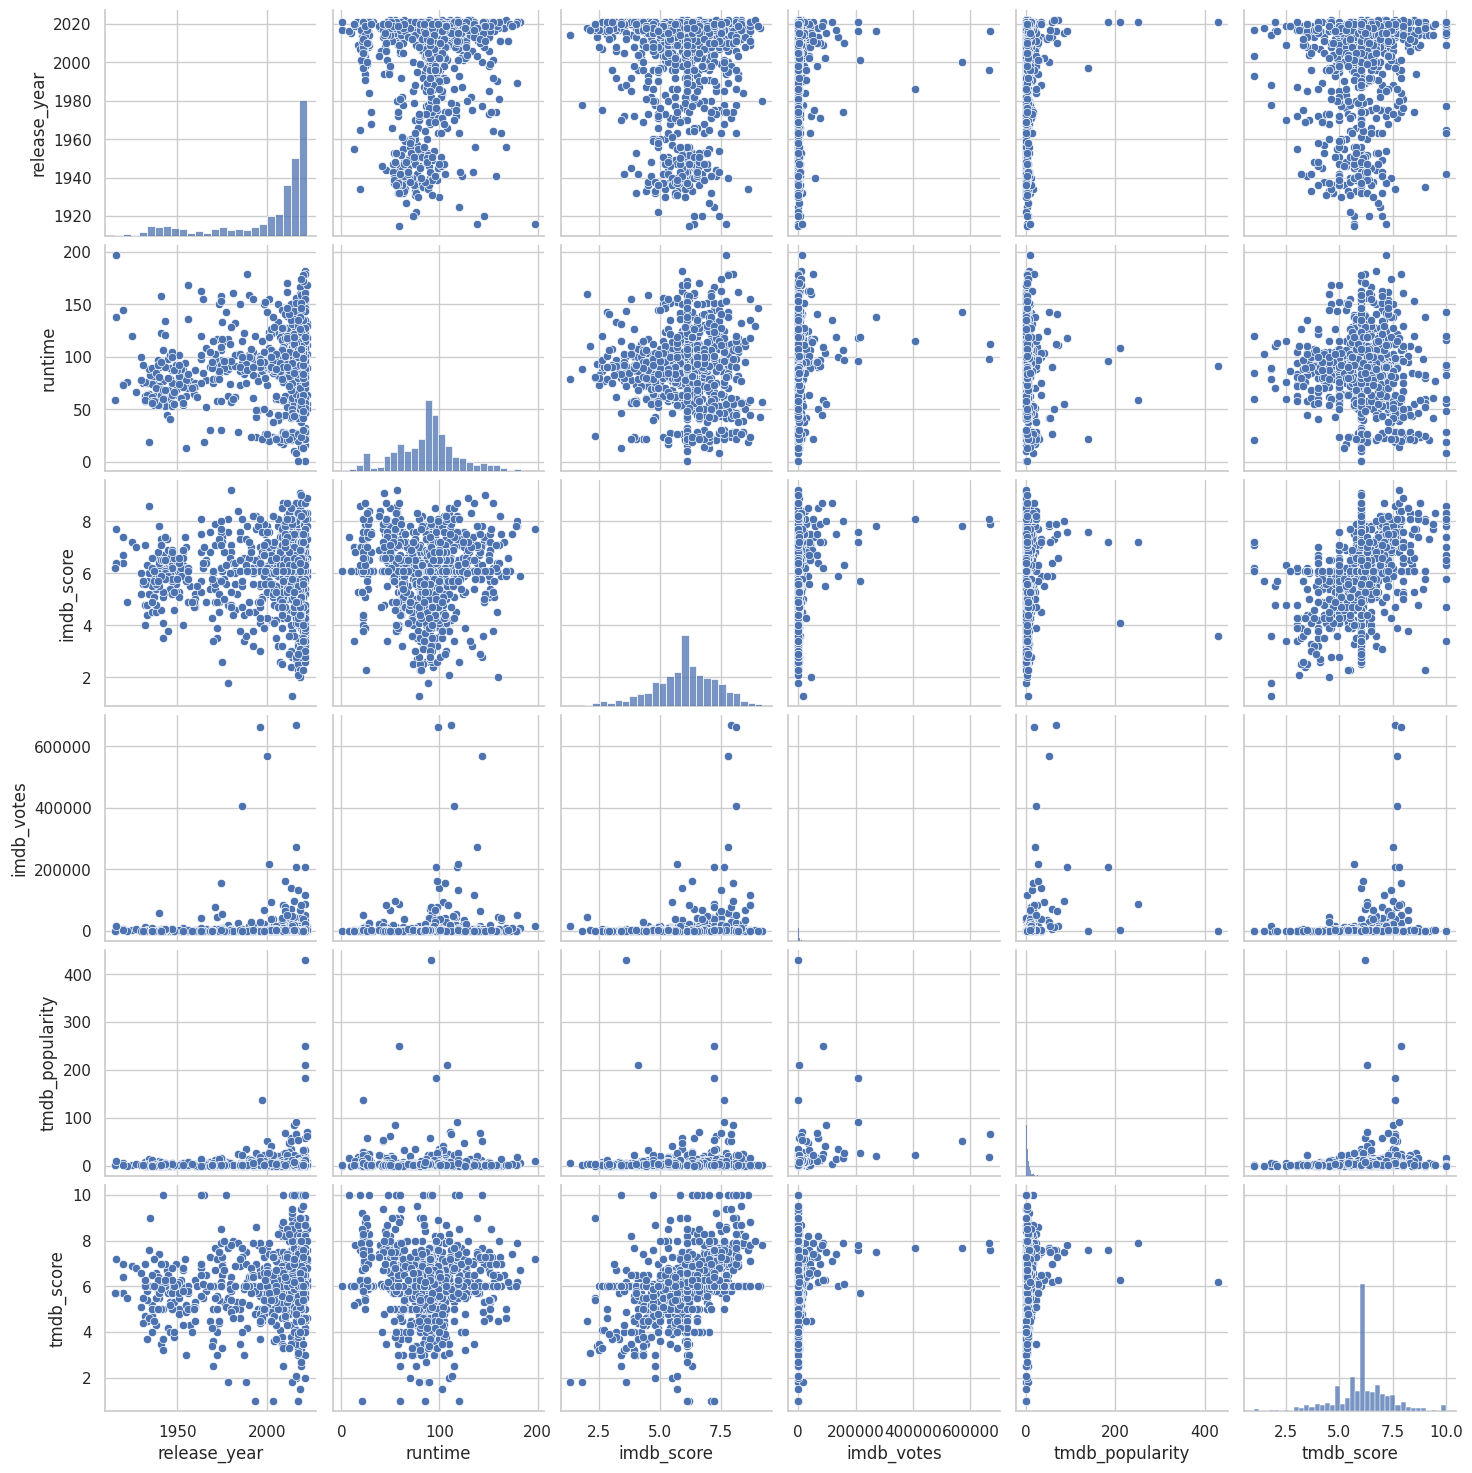

In [ ]:
sns.pairplot(titles_df.sample(1000, random_state=42)[["release_year","runtime","imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]])


##### 1. Why did you pick the specific chart?

Exploratory overview of univariate shapes and pairwise scatter to spot outliers and non-linear patterns.

##### 2. What is/are the insight(s) found from the chart?

* Right-skewed release years (recent content dominates).
* Votes & popularity are highly skewed with a few blockbusters.
* Confirms weak relationships seen in the heatmap.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Acquire & promote the right genres

* Prioritize Fantasy / Sci-Fi / Animation (highest median popularity) and strong Action/Thriller slates.

* Use PG-13/PG as default target certs for widest reach; keep R for adult-core rows. Avoid big bets on NC-17.

2. Balance the catalog by country

* Reduce US monoculture: increase high-quality supply from JP/IL/KR/GB/FR (above-average IMDb means).

* Fix “Unknown” country metadata—hurts discovery and localization.

3. Program for session length

* Movies: feature rails centered on 90–110 min.

* Shows: emphasize 25–45 min episodes; avoid extremes unless franchise-driven.

* Add “Quick Watch” and “Epic Stories” rails mapped to runtime.

4. Renewals & series depth

* Aim for 3–6 seasons where traction exists; diminishing returns beyond that unless growth is proven.

5. Ranking & merchandising

* Use a two-signal ranker: TMDB popularity (discovery) + Bayesian weighted IMDb (satisfaction).

* Pin/top-shelf rows: WR ≥ 7.0 or top-decile WR within genre.

# **Conclusion**



* The catalog skews to Drama/Comedy and US origin; popularity ≠ quality, runtime has little effect on ratings, and PG-13/PG content with Fantasy/Sci-Fi/Animation delivers the best median engagement.
* A focused acquisition mix, runtime-aware programming, and a two-signal ranking will raise CTR and completion without overspending.
* Cleanup of age/country metadata plus disciplined renewals (sweet spot 3–6 seasons) prevents waste and improves recommendations.

* Avoid over-promoting low-rated but popular titles and over-investing in very long content or NC-17—those are the clearest paths to negative impact.

